## EDA - Exploratory Data Analysis

TO DO:
- перестроить все для переименованных параметров

#### Импорт библиотек

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

#### Чтение данных

In [2]:
df = pd.read_parquet('data/train_data.parquet')

In [3]:
cols = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21']

#### График значений сенсоров двигателя 1

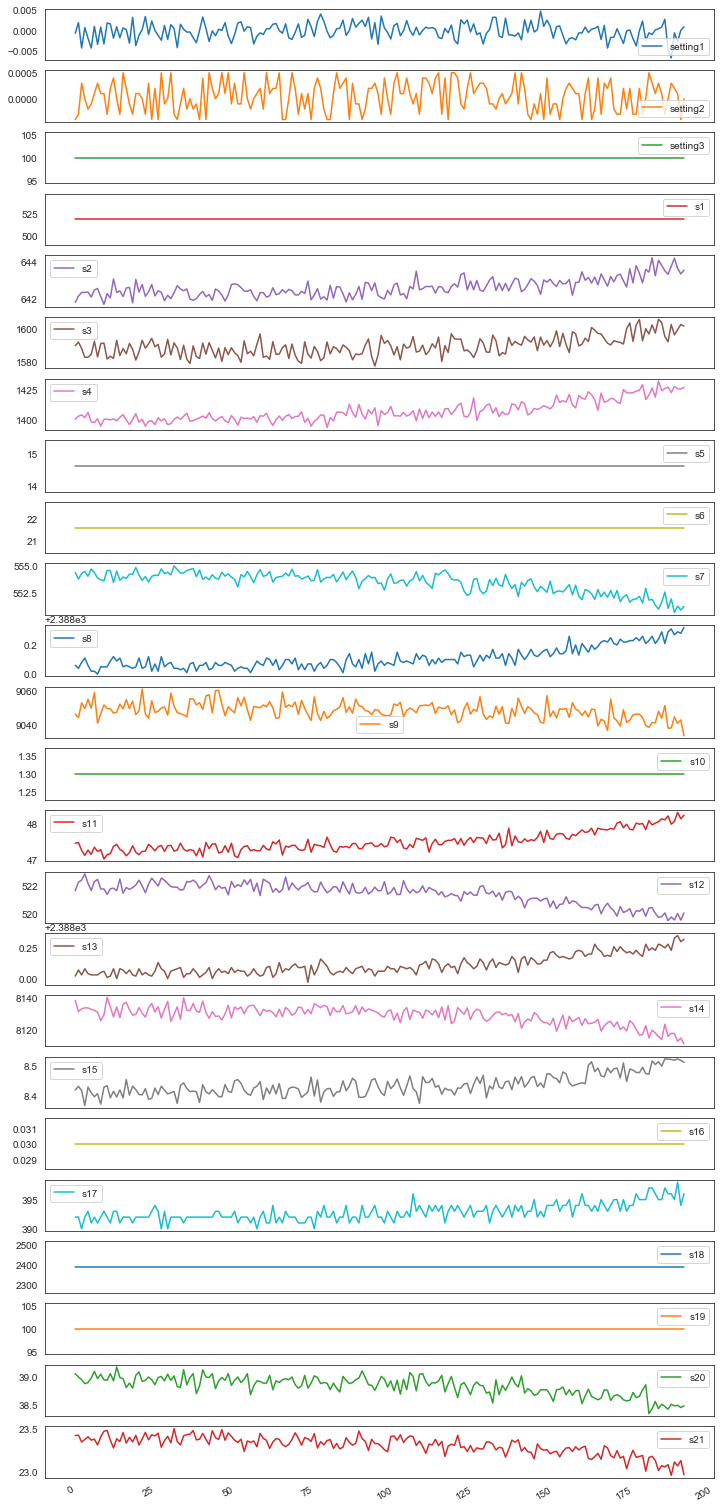

In [29]:
df[df.id == 1][cols].plot(subplots=True, figsize=(14,30))
plt.savefig('pics/orig0.png')
plt.show()

#### Рассмотрим изменение показателей сенсоров в разных двигателях

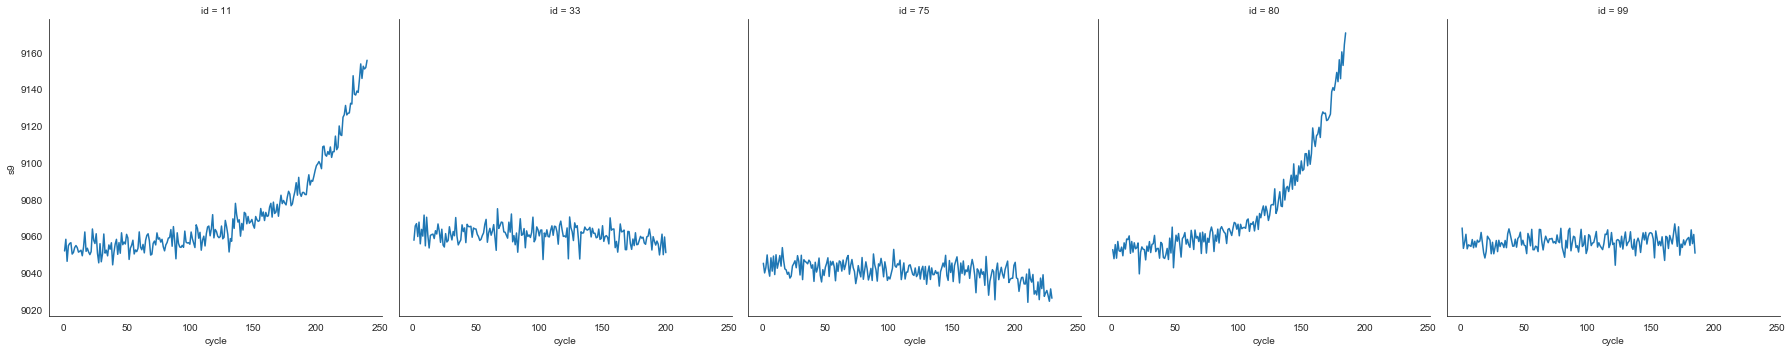

In [62]:
ids = list(np.random.choice(range(1,101), 5, replace=False))
sns.relplot(x='cycle', y='s9',col='id', kind='line', data=df[df.id.isin(ids)])
plt.show()

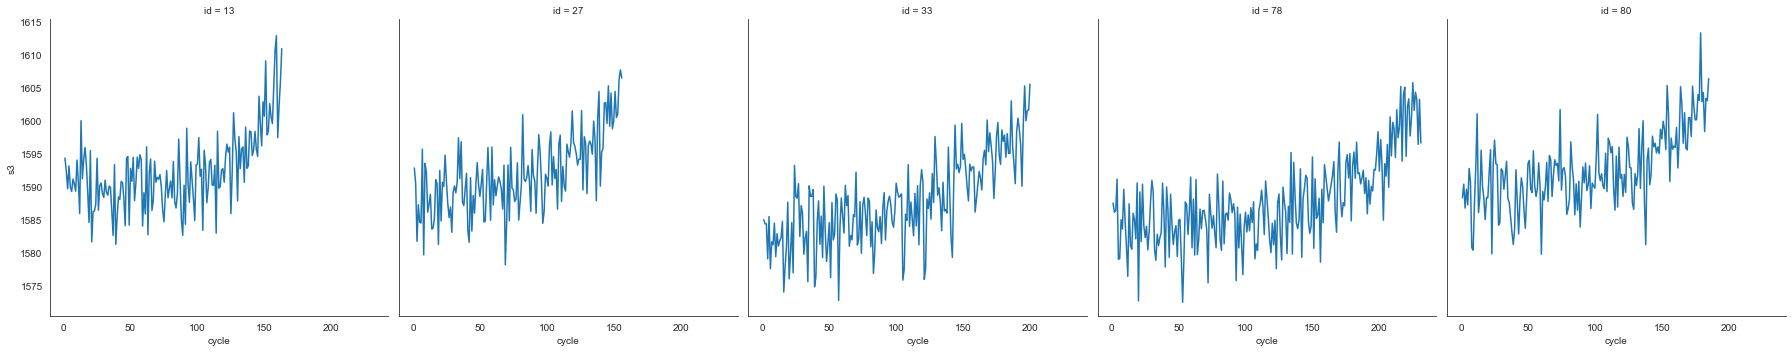

In [68]:
ids = list(np.random.choice(range(1,101), 5, replace=False))
sns.relplot(x='cycle', y='s3',col='id', kind='line', data=df[df.id.isin(ids)])
plt.show()

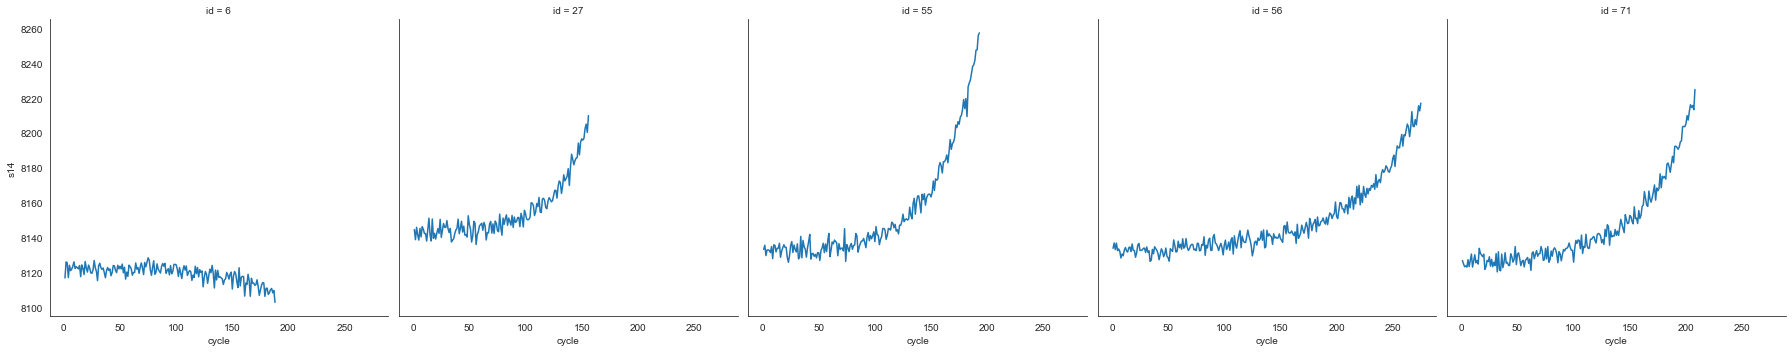

In [69]:
ids = list(np.random.choice(range(1,101), 5, replace=False))
sns.relplot(x='cycle', y='s14',col='id', kind='line', data=df[df.id.isin(ids)])
plt.show()

#### Рассмотрим матрицу корреляций признаков

In [39]:
corr = df[cols].corr().abs()
# corr.style.background_gradient(cmap=sns.diverging_palette(5, 250, as_cmap=True))
corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True))

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
setting1,1,0.0116604,nan,1.66993e-16,0.00902987,0.0056511,0.00954396,3.49155e-18,0.00134041,0.00943733,0.000426687,0.00427881,1.2254e-16,0.0116578,0.00149079,0.00231779,0.00446939,0.00765199,7.26838e-17,0.0025992,nan,nan,0.00571263,0.0145586
setting2,0.0116604,1,nan,6.87618e-16,0.00726624,0.00906783,0.0146728,1.62364e-16,0.0143546,0.0166779,0.0132847,0.00542497,7.69089e-16,0.0116904,0.0109225,0.0181564,0.00631032,0.014156,1.11865e-15,0.0122798,nan,nan,0.010554,0.00784556
setting3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
s1,1.66993e-16,6.87618e-16,nan,1,8.47657e-12,1.01134e-12,5.45014e-14,1,6.93551e-09,1.7654e-12,1.91182e-10,1.2442e-13,1,1.10958e-12,3.97319e-12,1.86206e-11,1.57648e-12,4.8843e-13,1,1.93402e-14,nan,nan,7.46736e-13,5.99674e-13
s2,0.00902987,0.00726624,nan,8.47657e-12,1,0.60261,0.714949,8.47571e-12,0.132242,0.702136,0.662325,0.273764,8.47571e-12,0.74002,0.724578,0.661792,0.179752,0.675975,8.47647e-12,0.629886,nan,nan,0.661841,0.66805
s3,0.0056511,0.00906783,nan,1.01134e-12,0.60261,1,0.678413,1.01362e-12,0.116039,0.664595,0.602481,0.322964,1.01365e-12,0.6959,0.680307,0.600963,0.237137,0.639921,1.01396e-12,0.600017,nan,nan,0.625941,0.633901
s4,0.00954396,0.0146728,nan,5.45014e-14,0.714949,0.678413,1,5.19626e-14,0.15048,0.79313,0.746852,0.297429,5.1363e-14,0.830136,0.815591,0.745158,0.190748,0.758459,5.05943e-14,0.703499,nan,nan,0.748067,0.745193
s5,3.49155e-18,1.62364e-16,nan,1,8.47571e-12,1.01362e-12,5.19626e-14,1,6.9355e-09,1.76652e-12,1.91183e-10,1.23919e-13,1,1.11401e-12,3.97404e-12,1.86217e-11,1.57032e-12,4.88493e-13,1,2.04852e-14,nan,nan,7.44994e-13,5.99436e-13
s6,0.00134041,0.0143546,nan,6.93551e-09,0.132242,0.116039,0.15048,6.9355e-09,1,0.15572,0.152161,0.0193472,6.9355e-09,0.160014,0.155884,0.158276,0.00211233,0.149042,6.93551e-09,0.13081,nan,nan,0.141419,0.137419
s7,0.00943733,0.0166779,nan,1.7654e-12,0.702136,0.664595,0.79313,1.76652e-12,0.15572,1,0.767132,0.217835,1.76629e-12,0.822805,0.812713,0.764611,0.110053,0.747051,1.76589e-12,0.692893,nan,nan,0.736163,0.737447


Высокая корреляция между признаками может мешать работе моделей

s16 с s1, s5, s10

s1  c s5, s10, s16

s5  c s16

s14 c s9

s11 c s4, s12, s7

s4  c s12, s11

s8  c s13

s7  c s12, s11


#### Рассмотрим корреляцию признаков с значением RUL

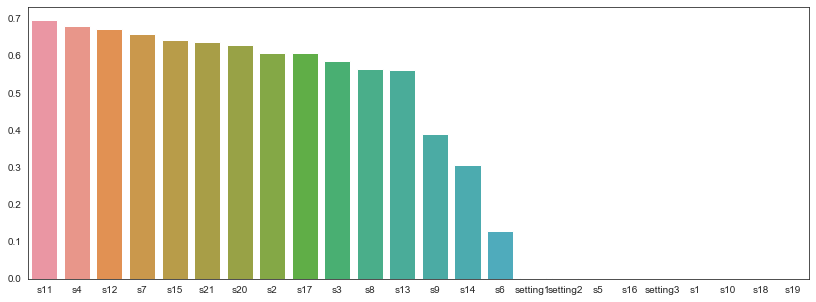

In [33]:
plt.figure(figsize=(14,5))
sns.barplot(x=df[cols].corrwith(df.RUL).abs().sort_values(ascending=False).index, y=df[cols].corrwith(df.RUL).abs().sort_values(ascending=False))
plt.show()

#### Рассмотрим среднеквадратичное отклонения каждого признака

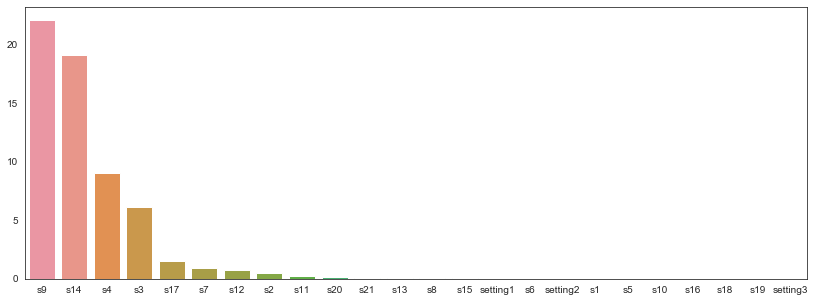

In [35]:
plt.figure(figsize=(14,5))
sns.barplot(x=df[cols].std().sort_values(ascending=False).index, y=df[cols].std().sort_values(ascending=False))
plt.show()

#### Отбор признаков для удаления

In [36]:
noninform_feat = ['s19', 's18', 's16', 's10', 's5', 's6', 's1', 'setting1', 'setting2', 'setting3']

#### Распределения значений каждого класса в параметрах 

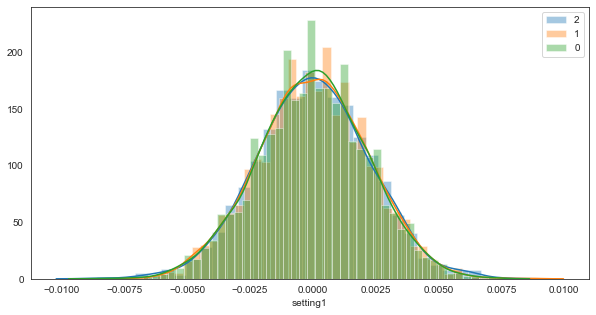

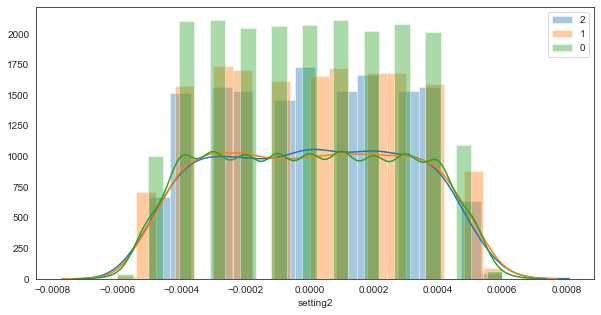

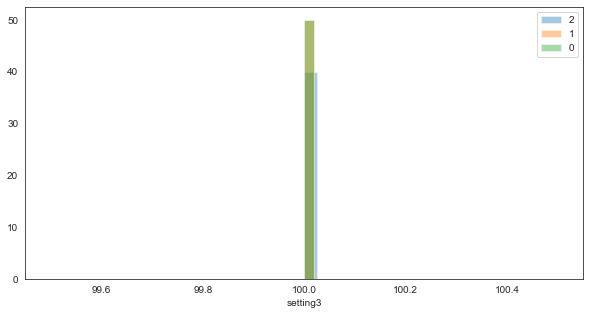

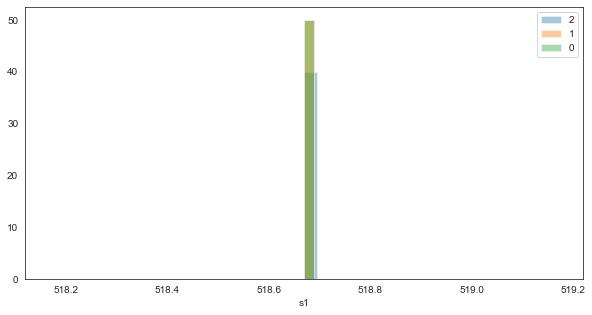

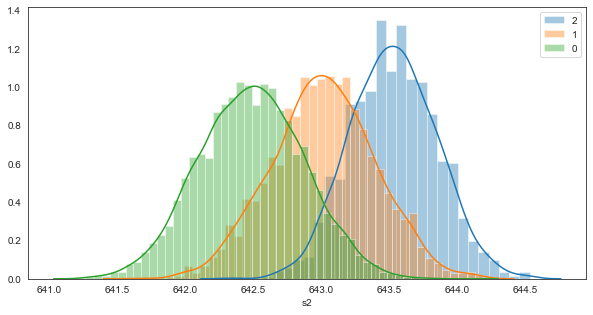

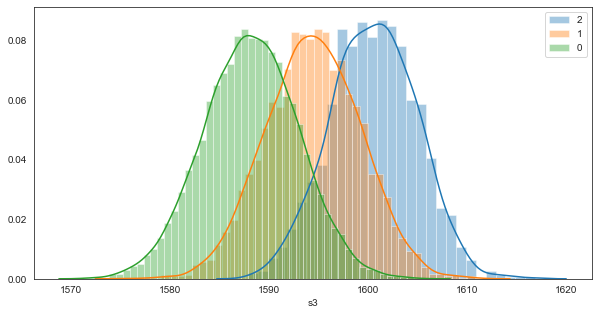

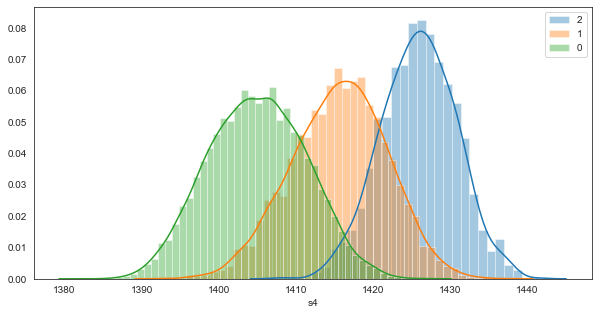

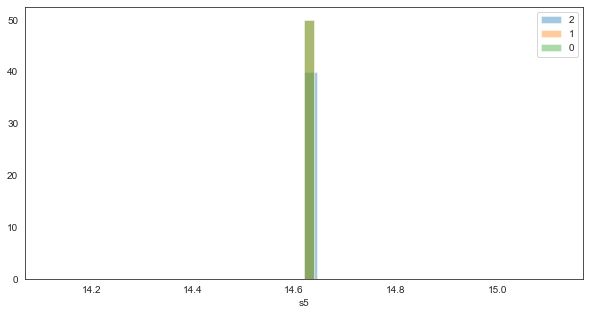

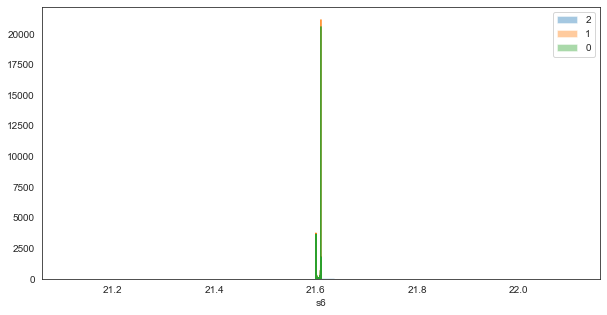

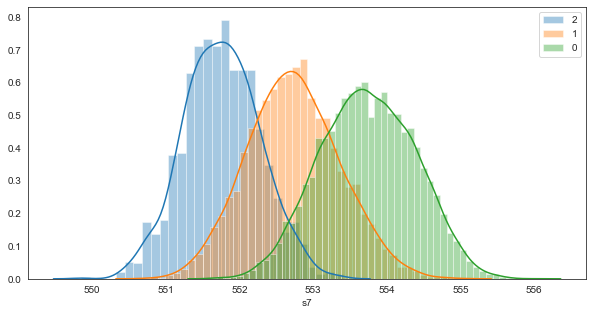

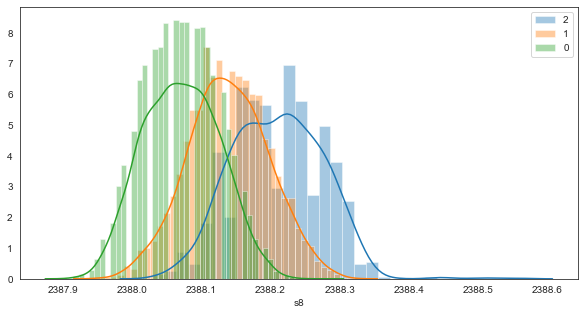

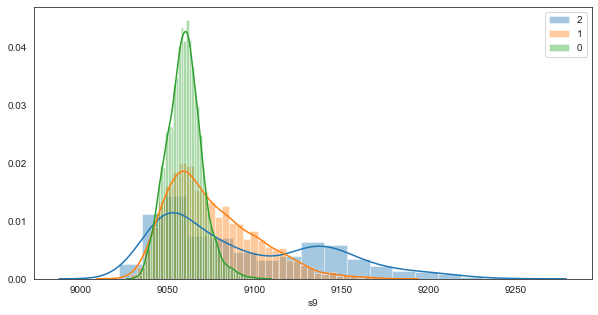

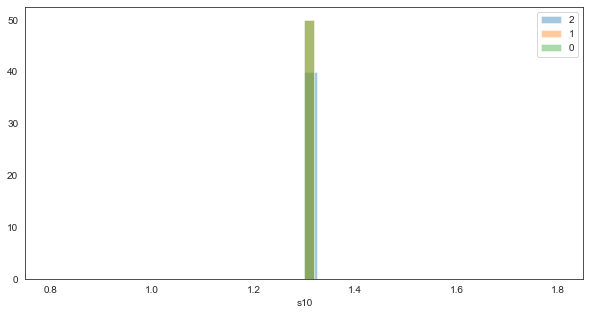

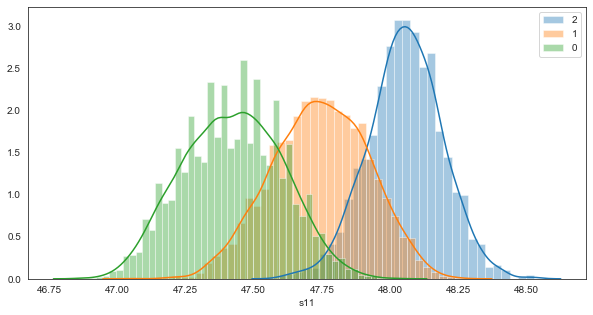

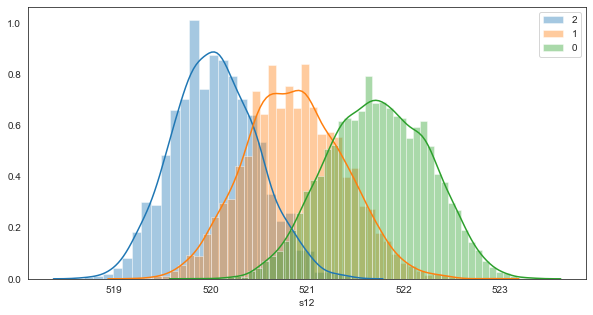

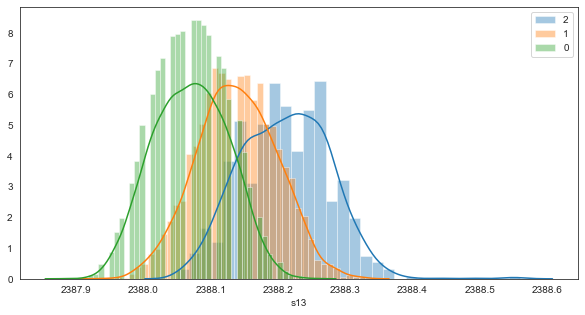

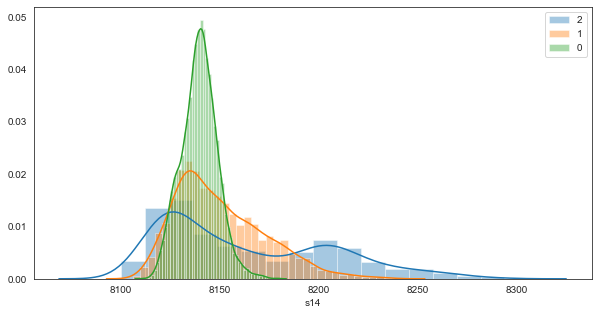

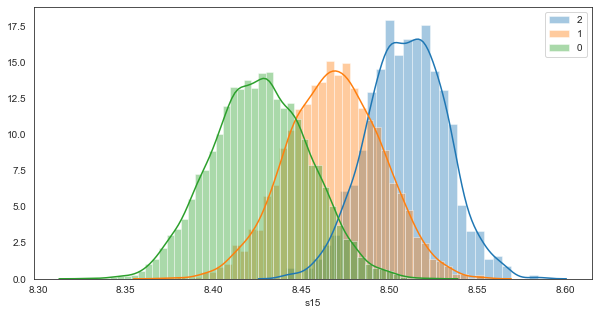

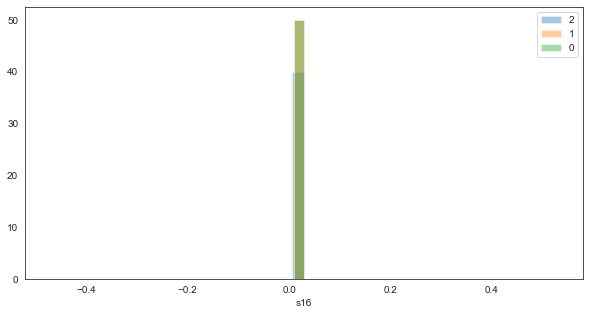

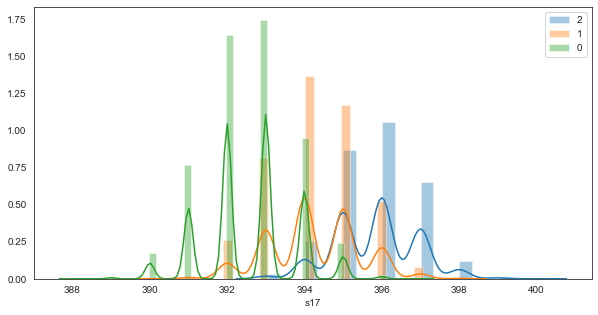

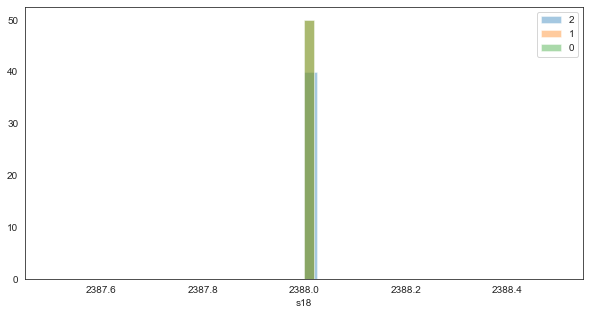

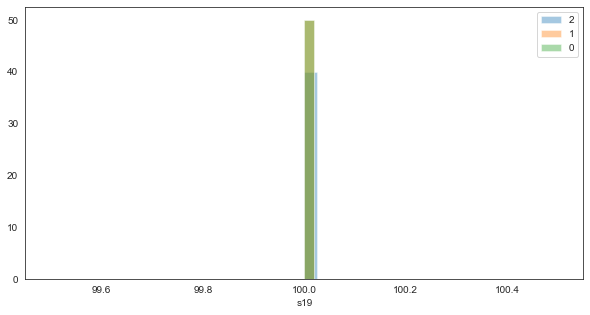

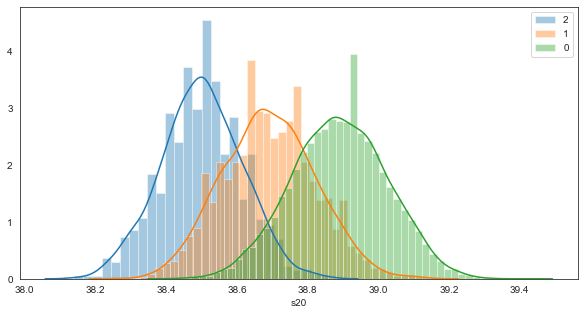

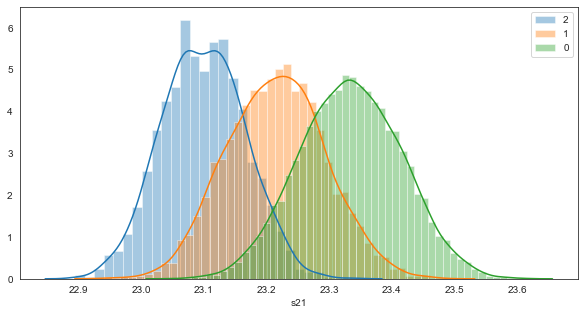

In [67]:
target_0 = df[df.label==0]
target_1 = df[df.label==1]
target_2 = df[df.label==2]
i = 0
for col in cols:
    
    plt.figure(figsize=(10,5))
    
    sns.distplot(target_2[[col]],label='2')
    sns.distplot(target_1[[col]], label='1')
    sns.distplot(target_0[[col]], label='0')
    
    plt.xlabel(col)
    plt.legend()
    plt.show()
    i+=1

#### Статистика по задаче классификации

In [65]:
print('Класс 0: {}%\nКласс 1: {}%\nКласс 2: {}%'.format(len(df[df.label==0])/len(df)*100,len(df[df.label==1])/len(df)*100,len(df[df.label==2])/len(df)*100))

Класс 0: 70.43284377877951%
Класс 1: 21.81183655663807%
Класс 2: 7.755319664582425%


#### Выводы
- Классы несбалансированны, значит имеет смысл смотреть на AUC-ROC метрику, вместо Accuracy
- Большинство параметров распределены нормально, что улучшит поведение моделей
- Некоторые признаки сильно коррелируют между собой и это может негативно повлиять на поведение алгоритмов
- Признаки с низким значением std можно удалить 